# Linear Regression
선형 회귀란 종속 변수 y와 한개 이상의 독립 변수 x와의 선형 관계를 모델링하는 회귀분석 기법이다. 쉽게 애기해 선을 그어 펼쳐 놓은 데이터에 근접한 결과를 예측해내는 것이다.

$H(x)=Wx+b $

# 선형 회귀에서 오차, 손실
하나의 선이 그어지면 당연하게도 데이터와의 오차가 발생 할 수 있다. 이를 손실(Loss)라고 한다.

# Minimize Cost
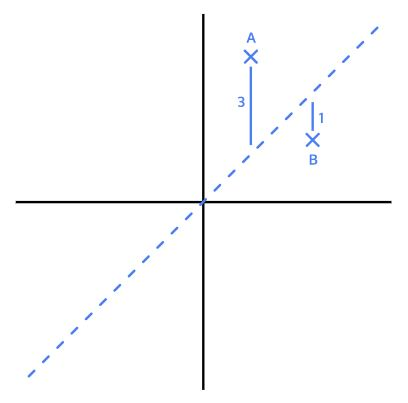

위 사진의 경우 A는 3만큼, B는 -1만큼의 오차가 있다. 여기서 이 오차값을 제곱하여 사용하는데, 이것은 평균 제곱 오차(MSE, mean squared error)라고 부른다. 이를 통해 오차가 적을 수록 기울기의 조정이 미세해질 것이고, 커질수록 더 큰 조정이 이루어 질 것이다.

# Cost function
$cost(W, b)=\frac{1}{m}\sum_{i=1}^{m}(H(x_i)-y_i)^2 $



# Gradient descent(경사 하강법)
해당 함수의 최소값 위치를 찾기 위해 비용 함수(Cost Function)의 그레디언트 반대 방향으로 정의한 step size를 가지고 조금씩 움직여 가면서 최적의 파라미터를 찾으려는 방법

$$
W \leftarrow W-\alpha\frac{1}{m}\sum^{m}_{i=1}(Wx^i-y^i)x^i
$$

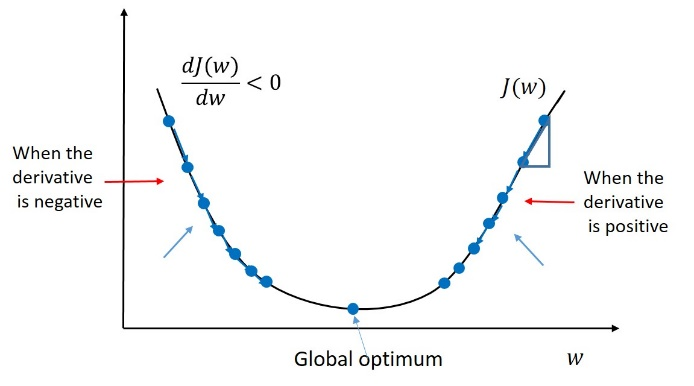

cost가 0으로 수렴할 수록 W가 중간으로 수렴한다. 경사가 점점 낮아지는걸 볼 수 있다.

기울기가 음수인 경우 음수-(음수), 양수인경우 양수-(양수) 이므로 어디에서 시작하든 결국 minimum값에 수렴하게 된다

* cost를 최소화 하는 대표적인 알고리즘
* 다수의 변수에도 적용이 가능
* linear regression의 핵심 알고리즘
* cost function을 설계할때 반드시 convex function이여야 한다

# Learning Rate
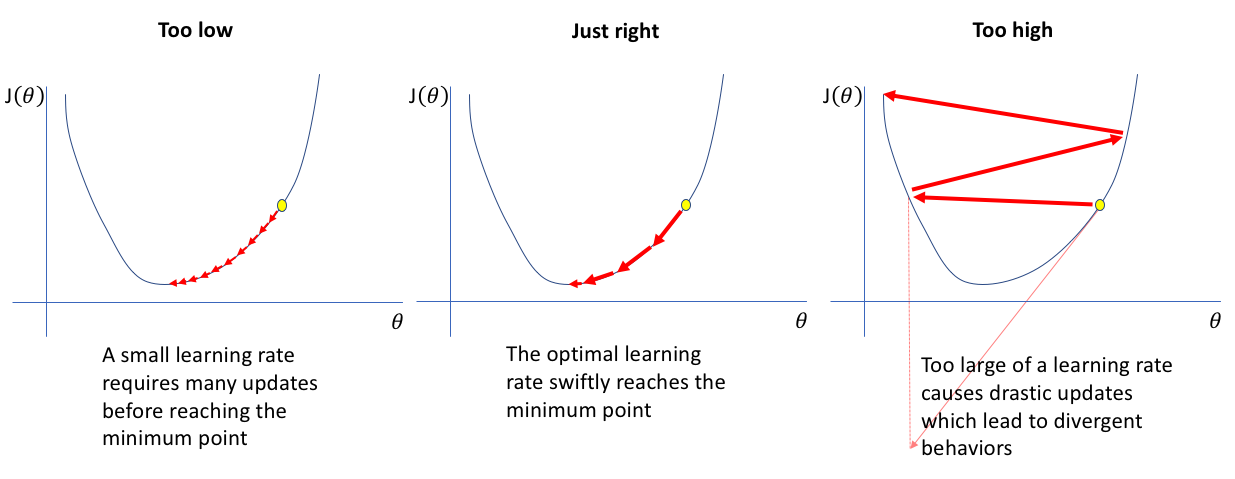

우리는 학습을 할때 학습률을 정해줘야 한다. 여기서 학습률을 너무 크게 설정하면 최적의 값을 제대로 찾지 못하고, 너무 작게 설정하면 너무 많은 시간이 걸린다. 인간으로 비유하면 학습률이 높으면 금방 고정 관념이 생기고, 학습률이 낮으면 많은 시간을 공부에 할량하게 된다. 그렇기 때문에 모델을 학습시킬때 최적의 학습률을 정하는것이 중요하다.

    i|         W|         b|      cost
    0|    2.4520|     0.376| 45.660004
   10|    1.1036|  0.003398|  0.206336
   20|    1.0128|  -0.02091|  0.001026
   30|    1.0065|  -0.02184|  0.000093
   40|    1.0059|  -0.02123|  0.000083
   50|    1.0057|  -0.02053|  0.000077
   60|    1.0055|  -0.01984|  0.000072
   70|    1.0053|  -0.01918|  0.000067
   80|    1.0051|  -0.01854|  0.000063
   90|    1.0050|  -0.01793|  0.000059
  100|    1.0048|  -0.01733|  0.000055
tf.Tensor(7.0162706, shape=(), dtype=float32)
tf.Tensor(105.98908, shape=(), dtype=float32)


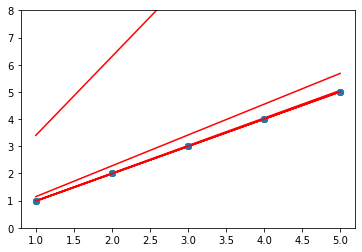

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)

# Gradient descent
learning_rate = 0.01

print("{:>5}|{:>10}|{:>10}|{:>10}".format('i', 'W', 'b', 'cost'))
for i in range(100+1):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        # reduce_mean : 차원을 줄이며 평균을 구함 [[1, 2, 3, 4], [5, 6, 7, 8]] -> [2.5, 7.5]
        # square : 제곱
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    W_grad, b_grad = tape.gradient(cost, [W, b]) # W, b의 기울기 반환

    W.assign_sub(learning_rate * W_grad) # A = A - B
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))
        plt.plot(x_data, y_data, 'o')
        plt.plot(x_data, hypothesis.numpy(), 'r-')
        plt.ylim(0, 8)
        
        
# predict
print(W * 7 + b)
print(W * 105.5 + b)

In [3]:
import tensorflow as tf
import numpy as np


X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

tf.random.set_seed(0)


x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal((1,), -100., 100.))

for step in range(300):
    hypothesis = W * X;
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
  290 |     0.0000 |   1.000046
